<a href="https://colab.research.google.com/github/ihassanjavaid/Fruits-Classification/blob/main/Fruits_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fruits 360 - Fruits and Vegetables Classification through CNN

In [1]:
!nvidia-smi

Mon Dec 21 11:01:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Import Statements**

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt 
from glob import glob

**Import Data from Kaggle through G-Drive**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [5]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [6]:
pwd

'/content/gdrive/My Drive/Kaggle'

**Download Data in Colab**

In [7]:
!kaggle datasets download -d moltean/fruits

 99% 750M/760M [00:07<00:00, 90.9MB/s]
100% 760M/760M [00:07<00:00, 110MB/s] 


In [8]:
!ls

fruits.zip  kaggle.json


**Un-zip the Data**

In [9]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg

## Classification

**Training and Testing Paths**

In [10]:
train_path = "/content/gdrive/MyDrive/Kaggle/fruits-360/Training/"
test_path = "/content/gdrive/MyDrive/Kaggle/fruits-360/Test/"

**Plot**

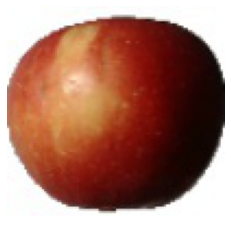

In [11]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

**Shape**

In [12]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


**Number of Classes**

In [13]:
className = glob(train_path + "/*")
numberOfClass = len(className)
print("NumberOfClass: ", numberOfClass)

NumberOfClass:  131


# CNN

**CNN Model**

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) #output
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

batch_size = 32

**Data Augmentation**

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.3,
                                    horizontal_flip=True,
                                    zoom_range=0.3)

test_datagen = ImageDataGenerator(rescale=1./255)

Generate Training Data

In [16]:
train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size = x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical")

Found 67692 images belonging to 131 classes.


Generate Test Data

In [17]:
test_generator = test_datagen.flow_from_directory(train_path, 
                                                    target_size = x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical")

Found 67692 images belonging to 131 classes.


**Model Training**

In [18]:
hist = model.fit_generator(generator = train_generator,
                    steps_per_epoch = 1600 // batch_size,
                    epochs = 100,
                    validation_data = test_generator,
                    validation_steps = 800 // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
50/50 [==============================] - 15s 152ms/step - loss: 4.7968 - accuracy: 0.0209 - val_loss: 3.9810 - val_accuracy: 0.0737
Epoch 2/100
50/50 [==============================] - 7s 148ms/step - loss: 3.9247 - accuracy: 0.0883 - val_loss: 3.2148 - val_accuracy: 0.1887
Epoch 3/100
50/50 [==============================] - 7s 145ms/step - loss: 3.2767 - accuracy: 0.1527 - val_loss: 2.6200 - val_accuracy: 0.2550
Epoch 4/100
50/50 [==============================] - 8s 165ms/step - loss: 2.7508 - accuracy: 0.2495 - val_loss: 1.8256 - val_accuracy: 0.4800
Epoch 5/100
50/50 [==============================] - 7s 149ms/step - loss: 2.1617 - accuracy: 0.3772 - val_loss: 1.6069 - val_accuracy: 0.5188
Epoch 6/100
50/50 [==============================] - 7s 145ms/step - loss: 1.9335 - accuracy: 0.4371 - val_loss: 1.1026 - val_accuracy: 0.6837
Epoch 7/100
50/50 [==============================] - 7s 144ms/step - loss: 1.6700 - accuracy: 0.4959 - val_loss: 0.9509 - val_accuracy: 0.728

Save the Model

In [19]:
model.save_weights("deneme.h5")

**Model Evaluation**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


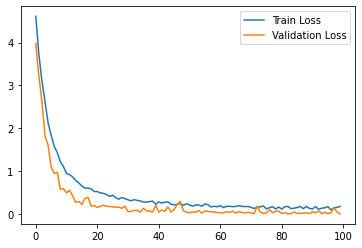

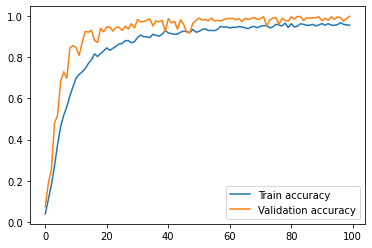

In [20]:
print(hist.history.keys())

plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(hist.history["accuracy"],label = "Train accuracy")
plt.plot(hist.history["val_accuracy"],label = "Validation accuracy")
plt.legend()
plt.show()

Saving History

In [21]:
import json

with open("deneme.json","w") as f:
    json.dump(hist.history, f)

Loading History

In [22]:
import codecs

with codecs.open("deneme.json","r",encoding="utf-8") as f:
    h = json.loads(f.read())

Training Loss, Validation and History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


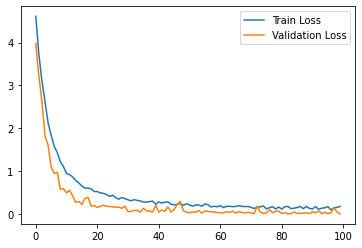

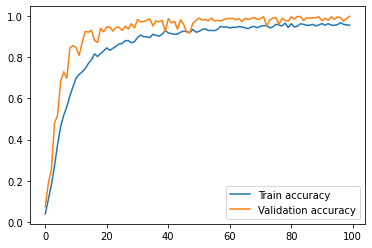

In [23]:
print(hist.history.keys())
plt.plot(h["loss"],label = "Train Loss")
plt.plot(h["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"],label = "Train accuracy")
plt.plot(h["val_accuracy"],label = "Validation accuracy")
plt.legend()
plt.show()

**Model Evaluation**

In [26]:
score = model.evaluate (test_generator,verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.012622094713151455
Test accuracy: 0.9962033629417419


## Predictions

In [37]:
labels = list(test_generator.class_indices.keys())
labels

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

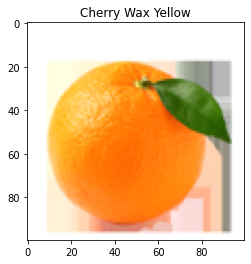

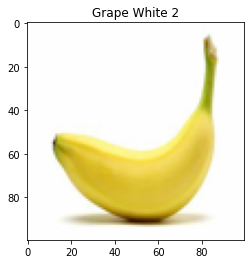

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


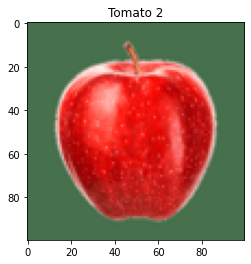

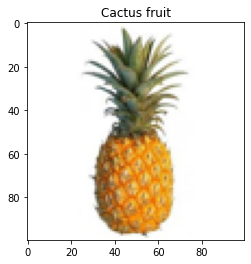

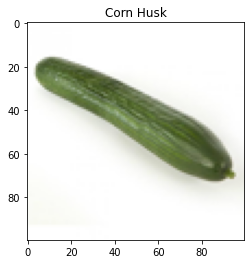

In [38]:
from urllib.request import urlopen
from PIL import Image
import requests
from io import BytesIO
import requests
import numpy as np

size = 100
random_images = ["https://5.imimg.com/data5/EE/ER/MY-27568370/fresh-orange-500x500.png",
                 "https://th.bing.com/th/id/OIP.EweoggqnL4Au_KK64MwVzgHaDt?pid=Api&rs=1",
                 "https://superprix.vteximg.com.br/arquivos/ids/175207-292-292/Maca-Argentina--1-unidade-aprox.-200g-.png?v=636294203590200000",
                 "http://sreesama.brands2home.com/wp-content/uploads/2018/04/pineapple.jpg",
                 "http://fthumb.approvedfood.co.uk/thumbs/75/1000/1000/1/src_images/Fresh_Whole_Cucumber.jpg"
                ]

def predict(img):
    y_pred = model.predict(np.array([img]))
    y_class = y_pred.argmax(axis=-1)
    #print (y_class, y_pred)
    return labels[y_class[0]]

IMAGE_SIZE = (size, size)

for url in random_images:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.convert('RGB')
    img = img.resize(IMAGE_SIZE) 
    arr = np.array(img)
    arr = arr/255
    plt.title(predict(arr))
    plt.imshow(img)
    plt.show()

# Resnet - Fast AI

In [39]:
from fastai.vision import *
from fastai.metrics import *

**Define Path**

In [40]:
path = "/content/gdrive/MyDrive/Kaggle/fruits-360"

**Data**

In [41]:
data = ImageDataBunch.from_folder(path, ds_tfms = get_transforms(),
                                  train='Training', valid='Test',
                                  size=360, bs=16)

Visualize Data

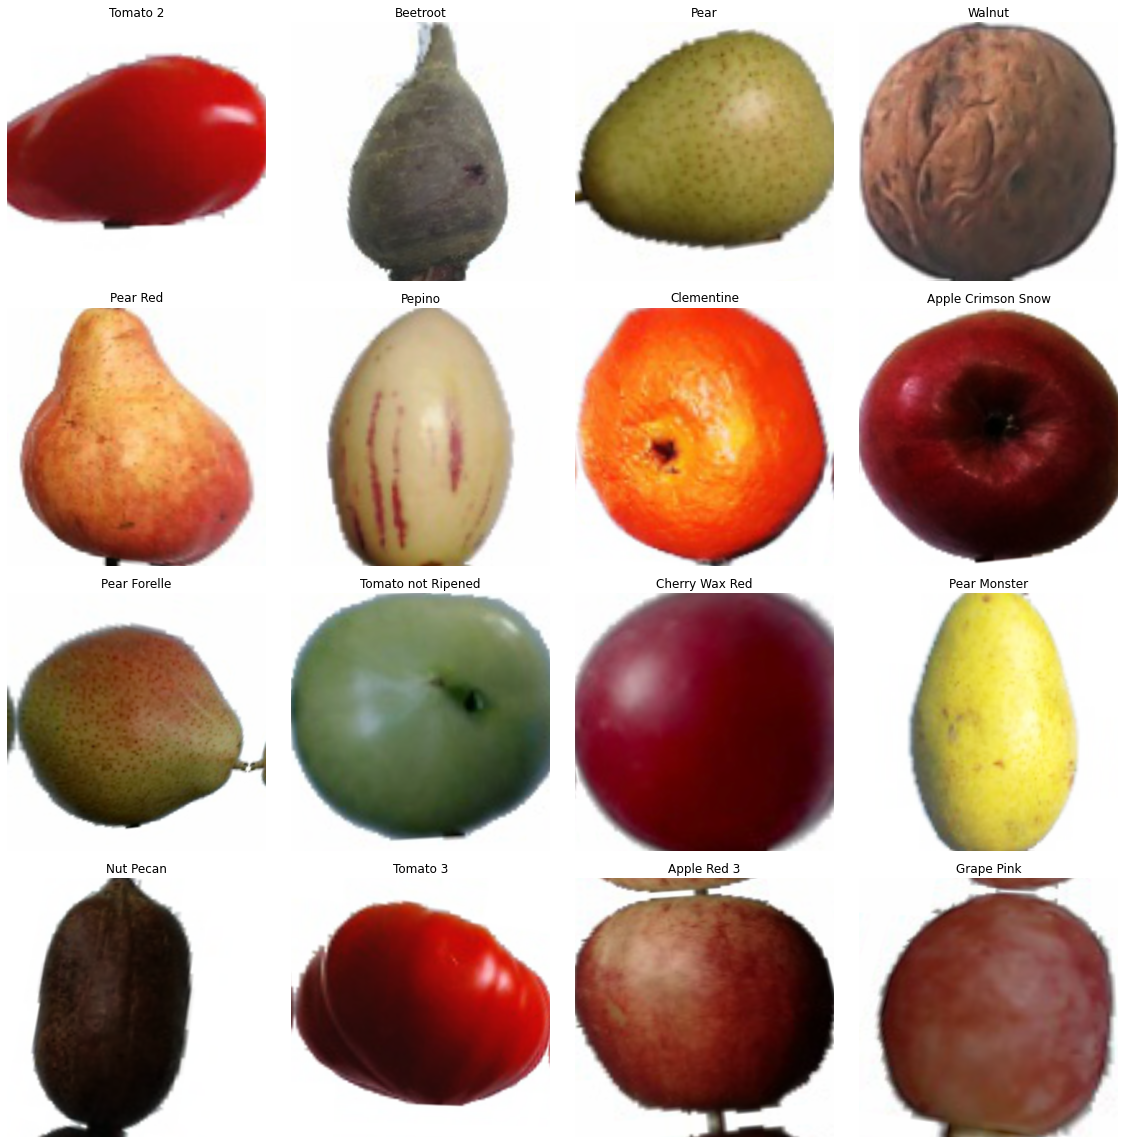

In [42]:
data.show_batch(4)

**Training**

*Initialize Model*

In [44]:
learn = cnn_learner(data, models.resnet18, metrics = accuracy, callback_fns = ShowGraph)

*Fit Data*

epoch,train_loss,valid_loss,accuracy,time
0,0.175643,0.046348,0.986909,20:06
1,0.033514,0.029604,0.992551,21:13


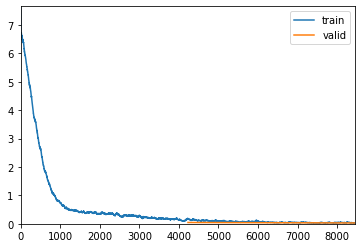

In [45]:
learn.fit_one_cycle(2)

Data to be predicted 

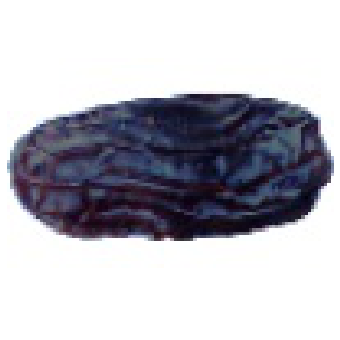

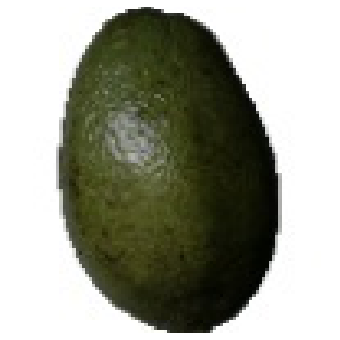

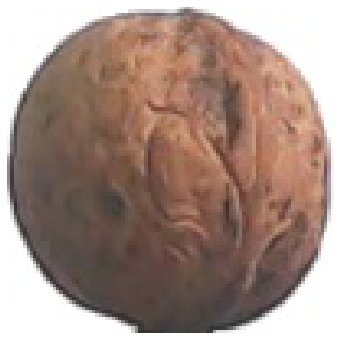

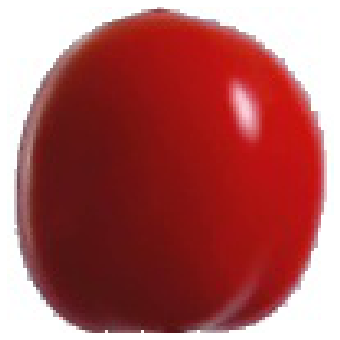

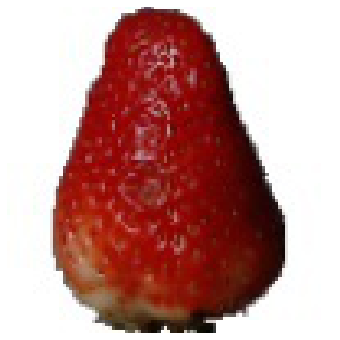

In [62]:
images = ["/content/gdrive/MyDrive/Kaggle/fruits-360/Test/Dates/104_100.jpg",
          "/content/gdrive/MyDrive/Kaggle/fruits-360/Test/Avocado/47_100.jpg",
          "/content/gdrive/MyDrive/Kaggle/fruits-360/Test/Walnut/104_100.jpg",
          "/content/gdrive/MyDrive/Kaggle/fruits-360/Test/Tomato 4/124_100.jpg",
          "/content/gdrive/MyDrive/Kaggle/fruits-360/Test/Strawberry/32_100.jpg"]

for image in images:
  img = open_image(image)
  img.show(figsize=(6,6))


Predict

In [64]:
for image in images:
  img = open_image(image)
  imgclass, y, idx = learn.predict(img)
  print(imgclass)

Dates
Avocado
Walnut
Tomato 4
Strawberry


*Predict Image from internet*

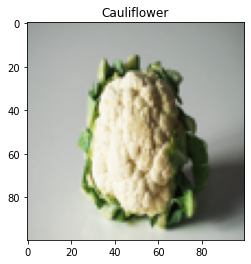

Prediction:  Cauliflower


In [88]:
response = requests.get("https://solidstarts.com/wp-content/uploads/cauliflower_edited-480x320.jpg")
img = Image.open(BytesIO(response.content))
img = img.convert("RGB")
img = img.resize(IMAGE_SIZE) 
arr = np.array(img)
arr = arr/255
plt.title(predict(arr))
plt.imshow(img)
plt.show()
print("Prediction: ",predict(arr))